### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://drive.google.com/file/d/1lX4D5IwkOjTANPD4avblYguZdpv1VAze/view?usp=sharing'
df_house = pd.read_csv('https://drive.google.com/uc?id=' + url.split('/')[-2])
df_house.head()

,Lot No.,Area,Age,Distance,Price
0,125,250.0,7,18,257.35
1,116,150.0,7,11,157.10
2,124,NaN,9,32,359.10
3,117,200.0,8,16,208.36
4,136,350.0,9,32,359.10


### Handling Null Values

Before proceeding with the Exploratory Data Analysis and Machine Learning, the quality of the data must first be ensured. Null or empty values may negatively affect the analysis done with the data. This is because null values can appear in fields that are critical for drawing accurate conclusions and predictions.

In this case, we will first check the number of null values in the data set and compare it with the number of records.

In [3]:
df_house[df_house.isnull().any(axis=1)] # Displays records that have missing values in any column

,Lot No.,Area,Age,Distance,Price
2,124,NaN,9,32,359.1
29,504,250.0,2,5,NaN


In [4]:
df_house.shape # Displays the number of rows and columns in the dataframe

(30, 5)

### Cleaning Null Values

The dataset contains a total of 30 entries of houses, with two instances of null values, one at index 2 under the field of `Area` and the other at index 29 under the field of `Price`. Since null values appeared at random and a small number, we can simply drop the records where it appeared.


In [5]:
df_house.dropna(inplace=True)
df_house.isnull().sum()

Lot No.     0
Area        0
Age         0
Distance    0
Price       0
dtype: int64

### Descriptive Statistics

After cleaning the data, we can start by looking at the dataset's descriptive statistics. These commonly involves the range, mean, median, and standard deviation.

In [6]:
df_house.describe()

,Lot No.,Area,Age,Distance,Price
count,28.000000,28.000000,28.000000,28.000000,28.000000
mean,273.285714,333.214286,5.214286,18.107143,338.689643
std,115.827412,148.923385,2.819997,13.022315,149.383865
min,116.000000,100.000000,1.000000,1.000000,101.200000
25%,181.000000,200.000000,2.000000,6.750000,205.805000
50%,271.500000,350.000000,6.000000,16.000000,355.315000
75%,332.750000,450.000000,7.250000,29.000000,456.260000
max,503.000000,600.000000,9.000000,42.000000,607.250000


### Exploratory Data Visualization

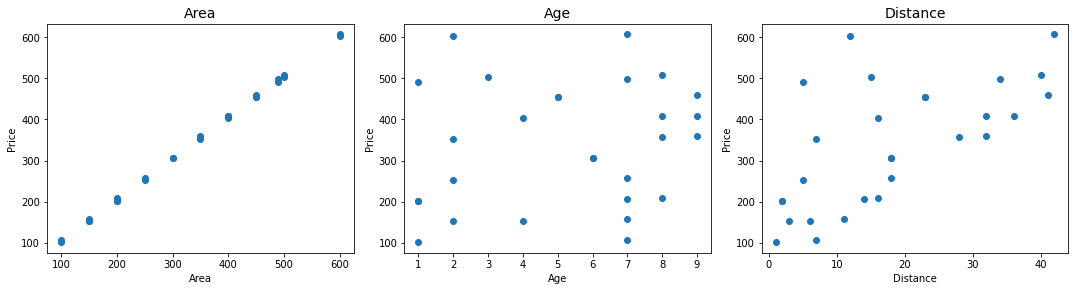

In [7]:
variables = ['Area', 'Age', 'Distance']

fig = plt.figure(figsize=(20, 15))

size = len(variables)

for i in range(size):
    ax = fig.add_subplot(4, 4, i+1)
    plt.scatter(x=df_house[variables[i]], y=df_house['Price'])
    ax.set_title(variables[i], fontsize=14)
    plt.xlabel(variables[i])
    plt.ylabel('Price')

fig.tight_layout()

<AxesSubplot:>

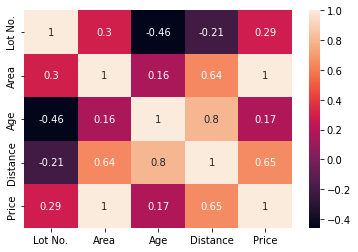

In [8]:
sns.heatmap(df_house.corr(), annot=True)

Based on the scatter plot and the heatmap generated by matplotlib and seaborn, respectively, there is a perfect positive correlation between the area of the house and its price. In contrast, there is a moderate positive correlation between the distance of the house to the city and its price. However, the correlation coefficient of the age of the house and the price is almost at zero which implies that there is little to no correlation between the two.

### Splitting the Independent and Dependent Variable

The dataframe has five columns: Lot No., Area, Age, Distance, and Price. Our goal is to create a machine learning model that is capable of predicting the price of houses. For this reason, we will need to identify the independent and dependent variable before creating the machine learning model. Based on the performed analysis, a house's Area, Age, and Distance from the city has an impact to the its price. This makes the Price the dependent variable (Y) that is influenced by the independent variables (X) of Area, Age, and Distance.

In [9]:
X = df_house[['Area', 'Age', 'Distance']].values.reshape(-1, 3)
Y = df_house['Price']

### Splitting the Data

In order to build the machine learning model, the data must be split into the training and testing datasets. This would be done by importing `train_test_split` from `sklearn.model_section`. Both the independent (X) and dependent (Y) variables will be split where the X_train and Y_train would be used to train the model and the X_test would be used as input to test the model and predict the prices of houses. To evaluate the model's prediction, the Y_test would be used as a benchmark. When splitting the training and testing sets 80:20 ratio would be used as it is commonly utilized.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

In [12]:
# Displays the size of the training sets
X_train.shape, Y_train.shape 

((22, 3), (22,))

In [13]:
# Displays the size of the testing sets
X_test.shape, Y_test.shape

((6, 3), (6,))

### Building the Machine Learning Model

Since the goal is to predict the price of houses, we would use the Linear Regression Model by importing `linear_model` from `sklearn`.

In [14]:
from sklearn import linear_model

In [15]:
# Creating a linear regression object
model = linear_model.LinearRegression()

In [16]:
# Training the model using the training sets
model.fit(X_train, Y_train)

LinearRegression()

Now that the model has been trained with the training dataset, we can start using it to make predictions. The Y_pred variable was created to store the predicted values based on the X_test.

In [17]:
Y_pred = model.predict(X_test)

### Evaluating the Model

To evaluate whether the prediction is accurate, we can measure it using the Mean Squared Error (MSE) and R-Squared by importing `mean_squared_error` and `r2_score` from sklearn.metrics. In order to prove that the model's quality is good, the value of the MSE should be closer to zero and the value of the R-Squared should be high.

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
print("Slope: ", model.coef_)
print("Intercept: ", model.intercept_)

Slope:  [0.99971163 0.97123501 0.00562097]
Intercept:  0.4004304764195581


In [20]:
mean_squared_error(Y_test, Y_pred)

0.009082732737491349

In [21]:
r2_score(Y_test, Y_pred)

0.9999986951321892

Based on the results, the model's predicted house prices are close to the actual house prices in Y_test. The MSE value of 0.0091 suggests that the error of the predictive model is only minimal. In addition, the R-Squared value of 0.9999987 indicates that there are minimal variance between the observed data and fitted values. These metrics prove the good quality and performance of the linear regression model for its minimal errors and variance.